<a href="https://colab.research.google.com/github/Arij-MB/RN_TP2/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
#charger le fichier
import os #question 1
import pandas #question 1

import seaborn #Pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales dans la question 4.
from sklearn.model_selection import train_test_split #question 7
from sklearn.neural_network import MLPClassifier #question 9
from sklearn import metrics #question 10 et 11
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #question 11
import matplotlib.pyplot as plt #la couble question 14
from keras.models import Sequential #question 16
from keras.layers import Dense,SimpleRNN #question 16


In [232]:
#1.Construction du dataFrame df.
os.chdir("/content/data")
dataframe = pandas.read_csv('Iris.csv')

In [233]:
#2. Les 10 premières lignes du DataFrame.
dataframe.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [234]:
#3.Les dimensions du dataframe.
dataframe.shape

(150, 6)

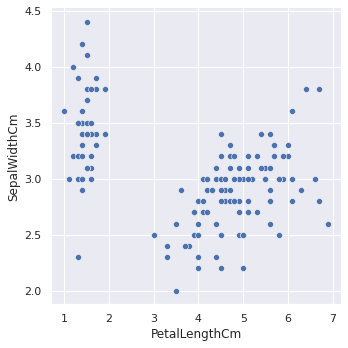

In [235]:
#4.Visualisation des données en fonction de la longueur des pétales et de largeur des sépales:
seaborn.relplot(data=dataframe, x="PetalLengthCm", y="SepalWidthCm")

In [236]:
#5.Labelliser les différentes espèces d’iris.
dataframe[dataframe["Species"]=='Iris-setosa']=0     #Iris_Setosa → 0
dataframe[dataframe["Species"]=='Iris-versicolor']=1 #Iris_Versicolor → 1
dataframe[dataframe["Species"]=='Iris-virginica']=2  #Iris_Virginica → 2 

In [237]:
#6.Les 10 premières lignes du nouveau DataFrame contenant les labels.
dataframe[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0.0,0.0,0
5,0,0.0,0.0,0.0,0.0,0
6,0,0.0,0.0,0.0,0.0,0
7,0,0.0,0.0,0.0,0.0,0
8,0,0.0,0.0,0.0,0.0,0
9,0,0.0,0.0,0.0,0.0,0


In [238]:
#7.Division de dataset en 70% des données d’apprentissage et 30% des données de test.
xt=dataframe.iloc[:,:-1]
yt=dataframe.iloc[:,-1:]
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.3)

print ("Train=" + str(x_train.shape) + ", Test=" + str(x_test.shape))

Train=(105, 5), Test=(45, 5)


In [239]:
#8.Les 10 premières données d’apprentissage
x_train.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,2,2.0,2.0,2.0,2.0
123,2,2.0,2.0,2.0,2.0
48,0,0.0,0.0,0.0,0.0
102,2,2.0,2.0,2.0,2.0
26,0,0.0,0.0,0.0,0.0
45,0,0.0,0.0,0.0,0.0
54,1,1.0,1.0,1.0,1.0
2,0,0.0,0.0,0.0,0.0
122,2,2.0,2.0,2.0,2.0
23,0,0.0,0.0,0.0,0.0


In [240]:
#8.Les 10 premières données de test.
x_train.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,2,2.0,2.0,2.0,2.0
123,2,2.0,2.0,2.0,2.0
48,0,0.0,0.0,0.0,0.0
102,2,2.0,2.0,2.0,2.0
26,0,0.0,0.0,0.0,0.0
45,0,0.0,0.0,0.0,0.0
54,1,1.0,1.0,1.0,1.0
2,0,0.0,0.0,0.0,0.0
122,2,2.0,2.0,2.0,2.0
23,0,0.0,0.0,0.0,0.0


In [241]:
#9.Apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150) en utilisant un perceptron multicouche
train_model=MLPClassifier(hidden_layer_sizes=(5,),solver="lbfgs",epsilon=0.07,max_iter=150)
train_model.fit(x_train.astype('int'), y_train.astype('int'))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(5,), max_iter=150,
              solver='lbfgs')

In [242]:
predict_model=train_model.predict(x_test.astype('int'))
predict_model

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1,
       2])

In [243]:
#10.Evaluation du perceptron
accuracy = metrics.accuracy_score(y_test.astype('int'),predict_model)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [284]:
#11.La matrice de confusion dans notre cas.
metrics.confusion_matrix(y_true=y_test.astype('int'), y_pred=predict_model)

array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 22]])

**12.Selon les résultats affichés commenter le perceptron que vous avez utilisé**

La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.

Dans notre cas, étant donnée que chaque ligne correspond à une classe réelle et chaque colonne correspond à une classe estimée. 
Sachant que:
Les valeurs respectivement des colonnes et des lignes sont: 
 

*   Setosa
*   Versicolor 
*   Virginica 

D'après la matrice de confusion : 
*   9 valeurs classées comme Setosa sont en réalité Virginica
*   14 valeurs sont bien classées
*   22 valeurs classées comme Virginica mais elles sont Setosa


In [246]:
#13.Ajoutons le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale à 0.7
train_model=MLPClassifier(hidden_layer_sizes=(len(x_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=0.7)
train_model.fit(x_train.astype('int'), y_train.astype('int'))
predict_model=train_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
predict_model

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1,
       2])

In [258]:
#14.étudions la variation du paramètre de taux d’apprentissage:
list_test_value=[]
list_train_value=[]
list_learning_rate=[]

for learning_rate in range(1,150):

  i=learning_rate/100
  list_learning_rate.append(i)
  
  train_model=MLPClassifier(hidden_layer_sizes=(5,),solver="lbfgs",epsilon=0.07,max_iter=200,learning_rate_init=i)
  train_model.fit(x_train.astype('int'), y_train.astype('int'))
  
  #Variation d’apprentissage
  train_predict_model=train_model.predict(x_train.astype('int'))
  list_train_value.append(metrics.mean_squared_log_error(y_train.astype('int'),train_predict_model))
 
  #Variation de test
  predict_model=train_model.predict(x_test.astype('int'))
  list_test_value.append(metrics.mean_squared_log_error(y_test.astype('int'),predict_model))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

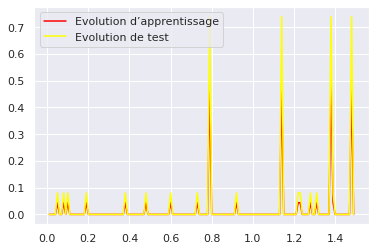

In [259]:
#14.Affichage de la courbe d'évolution d’apprentissage + celle de test en fonction de variation du taux d’apprentissage:
plt.plot(list_learning_rate,list_train_value,label="Evolution d’apprentissage",color='red')
plt.plot(list_learning_rate,list_test_value,label="Evolution de test",color='yellow')
plt.legend()
plt.show()

In [261]:
#15.Fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté
train_model=MLPClassifier(hidden_layer_sizes=(len(x_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=10)
train_model.fit(x_train.astype('int'), y_train.astype('int'))


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(5,), max_iter=10,
              solver='lbfgs')

In [262]:
#15.Surmonter le phénomène constaté par augmenter le nombre maximum d'itération
train_model=MLPClassifier(hidden_layer_sizes=(len(x_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=200)
train_model.fit(x_train.astype('int'), y_train.astype('int'))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(5,), solver='lbfgs')

In [273]:
#16.Tester d’autres classifieurs de type réseau de neurones 
sequentiel = Sequential()

sequentiel.add(Dense(len(x_train.columns),input_shape=(len(x_train.columns),),activation='relu'))
sequentiel.add(Dense(1,activation='softmax'))

sequentiel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
modelseq = sequentiel.fit(x_train.astype('int'), y_train.astype('int'))

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - acc: 0.3429


In [282]:
seq = Sequential()
seq.add(SimpleRNN(len(x_train.columns),return_sequences=True, return_state=True))
seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

**17.Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ? justifier vos réponses.**

Un réseau de neurones récurrents est un réseau de neurones artificiels présentant des connexions récurrentes, utilise des sorties qui sont une combinaison non linéaire de ses entrées. 
Dans notre cas, on n'a pas interêt à utiliser les réseaux de neurones récurrents parce que nous n'avons pas des données d'entrée de taille constante. En plus, notre cas ne traite pas une analyse de séries temporelles ni une reconnaissance de formes (reconnaissance automatique de la parole, écriture manuscrite...) 
